# Stochastic Simulation Algorithms for Aptamer Binding Kinetics

## Alexander Wang - 18.335 Final Project

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Define Aptamer Binding Kinetics Chemical Reaction System

In [5]:
# Aptamer + Target -> Aptamer-Target Complex (p = kc)
# Target + Site -> Active Target (p = ka)
# Aptamer-Target Complex -> Aptamer + Target (p = kd)
# Active Target -> Target + Site (p = ki)

# Columns correspond to Aptamer, Target, Aptamer-Target Complex, Site, Active Target
rxn_effects = np.array([[-1, -1, 1, 0, 0],
                        [0, -1, 0, -1, 1],
                        [1, 1, -1, 0, 0],
                        [0, 1, 0, 1, -1]])

In [6]:
def population_propensities(population, kc, ka, kd, ki):
    na, nt, natc, ns, nat = population
    propensities = [kc * na * nt,
                    ka * nt * ns,
                    kd * natc,
                    ki * nat]
    return propensities

### Direct Method

In [75]:
def next_rxn_dm(propensities):
    prop_sum = sum(propensities)
    r1, r2 = np.random.rand(), np.random.rand()
    tot, i = 0.0, 0
    for p in [prop / prop_sum for prop in propensities]:
        tot += p
        if tot > r2:
            break
        i += 1
    return 1.0 / prop_sum * np.log(1.0 / r1), i

In [76]:
def gillespie_dm(initial_population, rxn_effects, t_0, t_end, kc, ka, kd, ki):
    times, simulation = [t_0], [initial_population.copy()]
    t, pop = t_0, initial_population
    while t < t_end:
        props = population_propensities(pop, kc, ka, kd, ki)
        dt, rxn = next_rxn_dm(props)
        t += dt
        pop += rxn_effects[rxn]
        times.append(t)
        simulation.append(pop.copy())
    return times, np.array(simulation)

In [114]:
tic = time.perf_counter()
times, sim = gillespie_dm(np.array([50,100,0,200,0]), rxn_effects, 0, 1000, 80, 80, 0.1, 0.1)
toc = time.perf_counter()
print(toc - tic)

0.31356291200063424


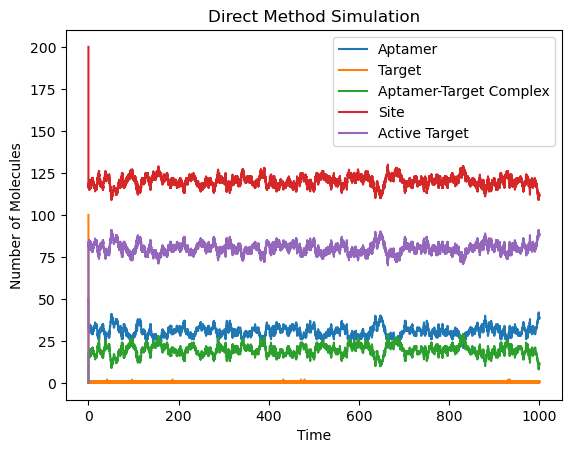

In [115]:
plt.plot(times, sim[:,0], label='Aptamer')
plt.plot(times, sim[:,1], label='Target')
plt.plot(times, sim[:,2], label='Aptamer-Target Complex')
plt.plot(times, sim[:,3], label='Site')
plt.plot(times, sim[:,4], label='Active Target')
plt.xlabel('Time')
plt.ylabel('Number of Molecules')
plt.title('Direct Method Simulation')
plt.legend()
plt.show()

### First Reaction Method

In [116]:
def next_rxn_frm(propensities):
    prop_sum = sum(propensities)
    taus = [1.0 / prop * np.log(1.0 / np.random.rand()) for prop in propensities]
    return np.min(taus), np.argmin(taus)

In [117]:
def gillespie_frm(initial_population, rxn_effects, t_0, t_end, kc, ka, kd, ki):
    times, simulation = [t_0], [initial_population.copy()]
    t, pop = t_0, initial_population
    while t < t_end:
        props = population_propensities(pop, kc, ka, kd, ki)
        dt, rxn = next_rxn_frm(props)
        t += dt
        pop += rxn_effects[rxn]
        times.append(t)
        simulation.append(pop.copy())
    return times, np.array(simulation)

In [118]:
tic = time.perf_counter()
times, sim = gillespie_frm(np.array([50,100,0,200,0]), rxn_effects, 0, 1000, 80, 80, 0.1, 0.1)
toc = time.perf_counter()
print(toc - tic)

/var/folders/8z/c8wmldn128j3xb8g7xbhlx7h0000gn/T/ipykernel_9689/496502707.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  taus = [1.0 / prop * np.log(1.0 / np.random.rand()) for prop in propensities]
/var/folders/8z/c8wmldn128j3xb8g7xbhlx7h0000gn/T/ipykernel_9689/496502707.py:3: RuntimeWarning: divide by zero encountered in divide
  taus = [1.0 / prop * np.log(1.0 / np.random.rand()) for prop in propensities]


0.723817803998827


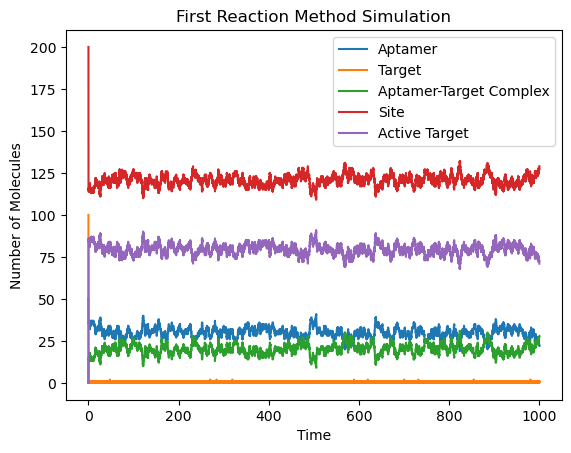

In [119]:
plt.plot(times, sim[:,0], label='Aptamer')
plt.plot(times, sim[:,1], label='Target')
plt.plot(times, sim[:,2], label='Aptamer-Target Complex')
plt.plot(times, sim[:,3], label='Site')
plt.plot(times, sim[:,4], label='Active Target')
plt.xlabel('Time')
plt.ylabel('Number of Molecules')
plt.title('First Reaction Method Simulation')
plt.legend()
plt.show()

### Random Selection Method

In [120]:
def next_rxn_rsm(propensities):
    r1, r2 = np.random.rand(), np.random.randint(0,len(propensities))
    return 1.0 / max(propensities) * np.log(1.0 / r1), r2

In [121]:
def gillespie_rsm(initial_population, rxn_effects, t_0, t_end, kc, ka, kd, ki):
    times, simulation = [t_0], [initial_population.copy()]
    t, pop = t_0, initial_population
    while t < t_end:
        props = population_propensities(pop, kc, ka, kd, ki)
        dt, rxn = next_rxn_rsm(props)
        t += dt
        if np.random.rand() * sum(props) < props[rxn]:
            pop += rxn_effects[rxn]
        times.append(t)
        simulation.append(pop.copy())
    return times, np.array(simulation)

In [122]:
tic = time.perf_counter()
times, sim = gillespie_rsm(np.array([50,100,0,200,0]), rxn_effects, 0, 1000, 80, 80, 0.1, 0.1)
toc = time.perf_counter()
print(toc - tic)

0.2916924099990865


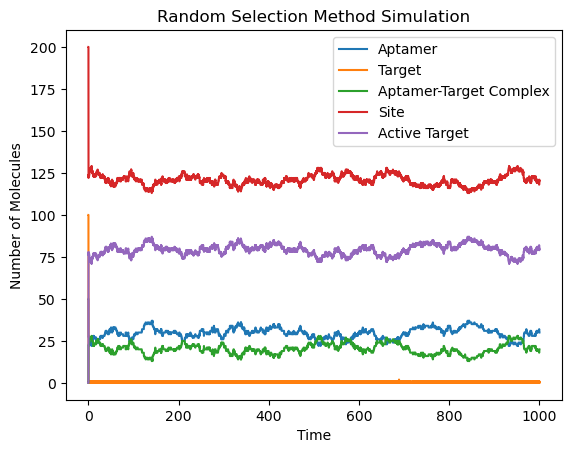

In [123]:
plt.plot(times, sim[:,0], label='Aptamer')
plt.plot(times, sim[:,1], label='Target')
plt.plot(times, sim[:,2], label='Aptamer-Target Complex')
plt.plot(times, sim[:,3], label='Site')
plt.plot(times, sim[:,4], label='Active Target')
plt.xlabel('Time')
plt.ylabel('Number of Molecules')
plt.title('Random Selection Method Simulation')
plt.legend()
plt.show()